In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Part 1
#Q1
data=pd.read_csv(r"C:\Users\USER\Downloads\ML Project - Decision Tree Airline Customer Satisfaction U16955468980.txt")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#Q2
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
data.isnull().any()

Unnamed: 0.1                         False
Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure D

In [10]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [5]:
#Q3
data.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
#Q4
data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [7]:
#Q5 
data.columns = data.columns.str.replace(' ', '_')

In [28]:
data

,Unnamed:_0.1,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [8]:
#Q6
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1,'neutral or dissatisfied': 0})

In [9]:
data

,Unnamed:_0.1,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,0
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,...,4,4,3,4,5,4,5,1,11.0,1


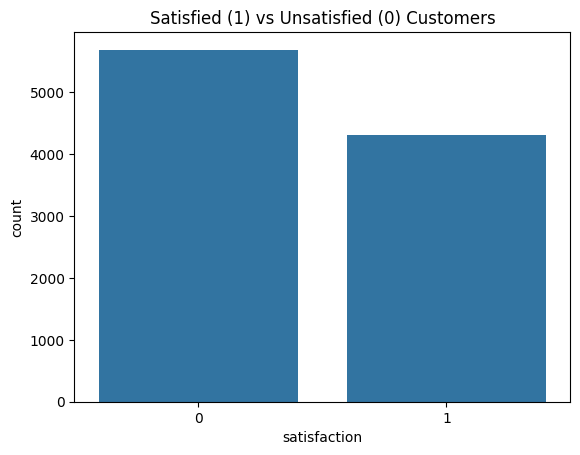

In [10]:
#Q7
sns.countplot(x="satisfaction",data=data)
plt.title('Satisfied (1) vs Unsatisfied (0) Customers')
plt.show()

In [11]:
#Q8
gender_mean = data.groupby('Gender')['satisfaction'].mean()
print(gender_mean)

Gender
Female    0.424432
Male      0.438062
Name: satisfaction, dtype: float64


In [12]:
#Q9
satisfaction_mean=data.groupby('Age')['satisfaction'].mean()
satisfaction_mean

Age
7     0.071429
8     0.081967
9     0.194030
10    0.137255
11    0.115942
        ...   
76    0.000000
77    0.222222
79    0.666667
80    0.111111
85    0.000000
Name: satisfaction, Length: 74, dtype: float64

In [13]:
#Q10
Food_and_drink=data.groupby('Food_and_drink')['satisfaction'].mean()
Food_and_drink

Food_and_drink
0    0.625000
1    0.198142
2    0.362305
3    0.404990
4    0.515050
5    0.566176
Name: satisfaction, dtype: float64

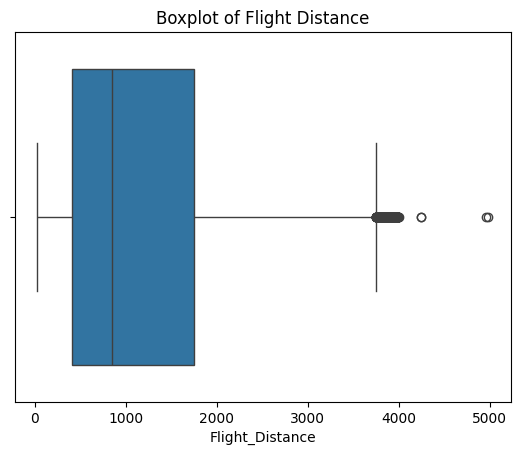

In [14]:
#Q11
sns.boxplot(x=data["Flight_Distance"])
plt.title('Boxplot of Flight Distance')
plt.show()

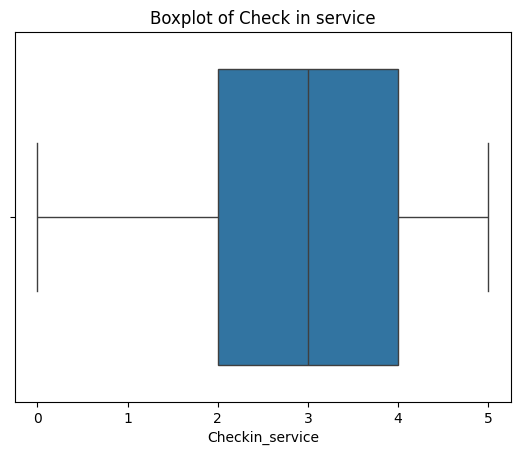

In [15]:
#Q12
sns.boxplot(x=data["Checkin_service"])
plt.title('Boxplot of Check in service')
plt.show()

In [16]:
#Q13
data.isnull().sum()

Unnamed:_0.1                          0
Unnamed:_0                            0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26


In [17]:
#Q14
data.dropna(inplace=True)

In [18]:
#Q15
data['Flight_Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], shape=(2430,))

In [102]:
from sklearn.preprocessing import LabelEncoder

In [40]:
#Part 2
#Q1
encoder = LabelEncoder()

In [28]:
data["Gender"]=pd.DataFrame(encoder.fit_transform(data["Gender"]),columns=["Gender"])

In [30]:
data["Customer Type"]=pd.DataFrame(encoder.fit_transform(data["Customer Type"]),columns=["Customer Type"])

In [32]:
data["Type of Travel"]=pd.DataFrame(encoder.fit_transform(data["Type of Travel"]),columns=["Type of Travel"])

In [34]:
data["Class"]=pd.DataFrame(encoder.fit_transform(data["Class"]),columns=["Class"])

In [38]:
#Q2
data.drop(["Unnamed: 0.1","id"],axis=1)

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,0,50,0,0,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,1,0,38,0,0,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,0,0,39,0,0,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,1,0,52,0,0,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [50]:
#Q3
x = data.drop('satisfaction', axis=1)  #feature data
y = data['satisfaction']  #target Data

In [103]:
from sklearn.preprocessing import StandardScaler

In [67]:
#Q4
scaler=StandardScaler()

In [68]:
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)   #scalling x_train

In [69]:
x_train

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.831470,0.831470,-0.787175,1.024551,-0.469513,-0.080899,-0.660504,0.662319,-0.593120,1.698305,...,1.200005,1.239335,0.495843,-1.799760,1.162911,-1.791614,1.157355,1.307959,-0.199899,-0.079183
1,1.483423,1.483423,-1.311951,1.024551,-0.469513,1.641941,1.513995,0.662319,-0.777947,-1.293973,...,-0.311812,-0.250922,-0.281036,0.494999,-2.190230,-1.791614,0.315948,-0.204788,-0.382703,-0.388917
2,-0.687448,-0.687448,-0.905830,-0.976037,2.129867,-1.273635,-0.660504,0.662319,-0.176763,0.202166,...,1.200005,1.239335,-1.834795,1.259918,-0.513659,-1.791614,0.315948,1.307959,-0.069325,0.488663
3,0.114875,0.114875,-1.248097,1.024551,-0.469513,-0.279688,-0.660504,0.662319,-1.075061,0.950235,...,0.444096,0.494206,1.272723,-1.034840,1.162911,-1.791614,-1.366865,0.551585,-0.382703,-0.388917
4,-1.599698,-1.599698,-0.855756,1.024551,-0.469513,-0.743530,-0.660504,-0.949162,-1.093941,-0.545904,...,-1.067721,-0.996050,-1.057915,-1.034840,-0.513659,-1.006292,0.315948,-0.961161,-0.382703,-0.388917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.466139,1.466139,-0.146040,-0.976037,-0.469513,-2.135055,1.513995,0.662319,1.276016,-0.545904,...,-0.311812,-0.250922,-1.057915,1.259918,0.324626,-1.791614,-1.366865,-0.204788,0.217938,0.049873
7996,-0.043100,-0.043100,0.971881,-0.976037,2.129867,-0.544741,-0.660504,-0.949162,0.703649,0.202166,...,-1.067721,-0.250922,0.495843,-1.034840,-1.351945,-0.220970,0.315948,-0.204788,-0.382703,-0.388917
7997,-0.594460,-0.594460,1.010151,-0.976037,-0.469513,0.979310,-0.660504,0.662319,-0.831606,0.950235,...,0.444096,0.494206,0.495843,0.494999,0.324626,-1.791614,0.315948,-0.961161,0.244053,-0.001749
7998,1.680461,1.680461,-0.333357,1.024551,-0.469513,0.581732,1.513995,0.662319,-0.746149,0.202166,...,1.200005,1.239335,-0.281036,-1.799760,-1.351945,-1.006292,-1.366865,1.307959,-0.382703,-0.388917


In [104]:
from sklearn.model_selection import train_test_split

In [94]:
#Q5
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
#Q6
model = RandomForestClassifier()

In [99]:
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
model.score(x_train,y_train)*100

100.0

In [100]:
model.score(x_test,y_test)*100

94.55

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix

In [108]:
#Q7
y_pred=model.predict(x_test)

In [110]:
accuracy_score(y_pred,y_test)*100

94.55

In [111]:
print(classification_report(y_pred,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.94      0.95      1193
              satisfied       0.92      0.95      0.93       807

               accuracy                           0.95      2000
              macro avg       0.94      0.95      0.94      2000
           weighted avg       0.95      0.95      0.95      2000



In [122]:
print(confusion_matrix(y_test, y_pred))

[[1124   40]
 [  69  767]]


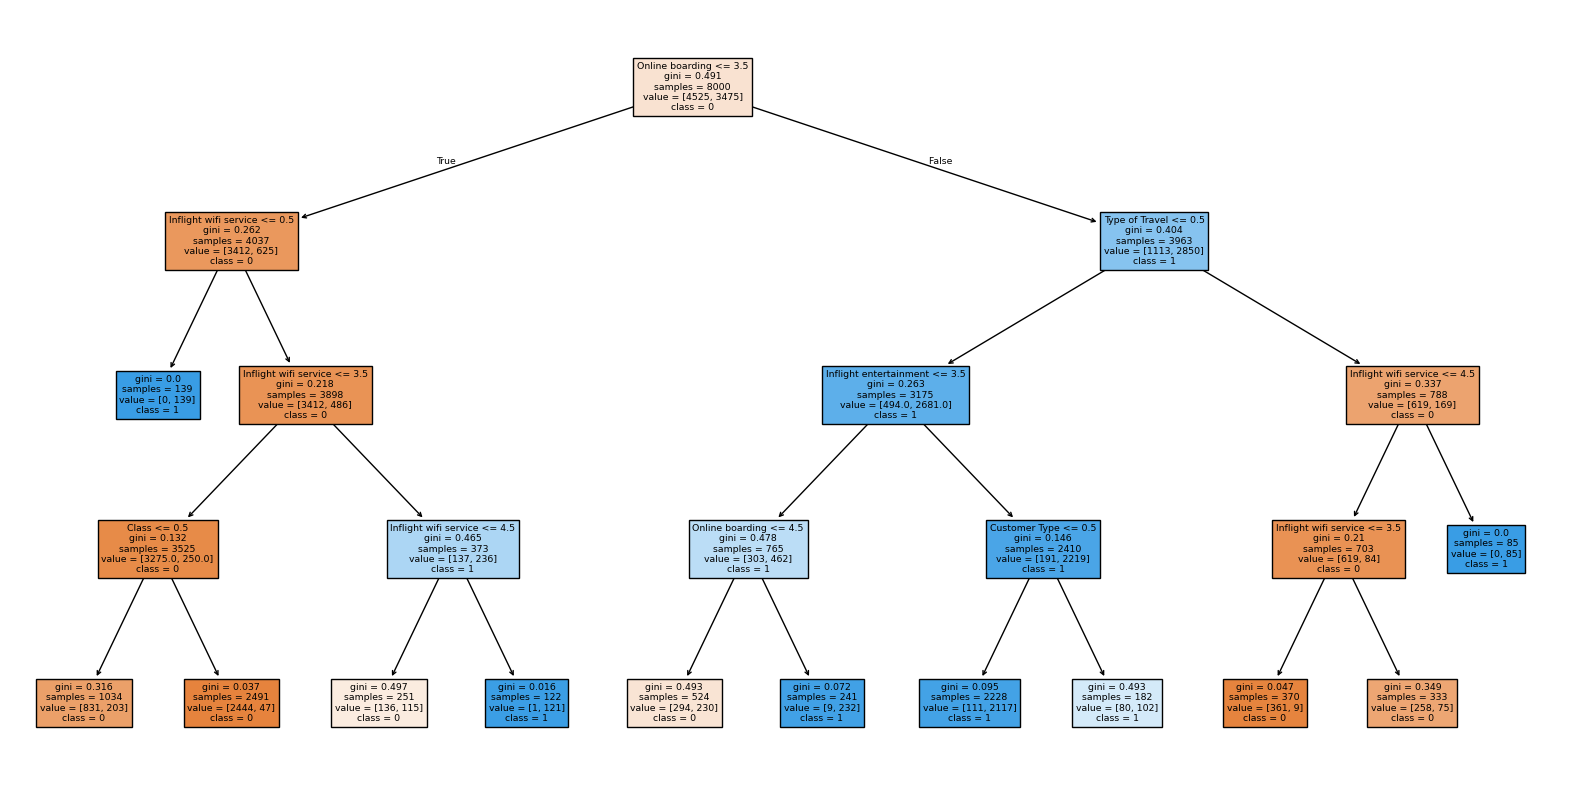

In [121]:
#Visualize the tree:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()